In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from darts import TimeSeries

## Modifying Data

### Cleansing Raw Indonesian Rice Price Data to form per Year Dataset

In [2]:
def saveTimeSeries(data, year):
    series = TimeSeries.from_dataframe(data, time_col='month', value_cols=['premium', 'medium', 'bad'])
    series.to_pickle('clean-data/rice_quality_indo_' + str(year) + '.pkl') #save to pickle

def cleansing(year):
    data = pd.read_excel('raw-data/Rata-Rata Harga Beras Bulanan di Tingkat Penggilingan Menurut Kualitas ' + str(year) + '.xlsx')
    data = data.iloc[2:5, 1:13]
    data.columns = [ str(datetime.strptime(str(i) + '-' + str(year), '%m-%Y').date()) for i in range(1, 13)]
    data = data.T
    data.columns = ['premium', 'medium', 'bad']
    data = data.replace('-', np.NaN)
    data.reset_index(inplace=True)
    data = data.rename(columns = {'index':'month'})
    data.to_csv('clean-data/rice_quality_indo_' + str(year) + '.csv')
     # convert to time series file
    saveTimeSeries(data, year)
    

In [3]:
for i in range(2013, 2023):
    cleansing(i)

### Create Dataset with a Variety Range of the Years

In [4]:
def concatByYear(from_year: int, to_year: int):
    listData = []

    for i in range(from_year, to_year+1):
        listData.append(pd.read_csv('clean-data/rice_quality_indo_' + str(i) + '.csv', index_col=0))
    
    year = str(from_year) + '-' + str(to_year)
    data = pd.concat(listData)
    data.to_csv('clean-data/rice_quality_indo_' + year + '.csv')
    saveTimeSeries(data, year)
    return data.head(), data.tail()

In [5]:
concatByYear(2013,2016)
concatByYear(2013,2019)
concatByYear(2016,2019)
concatByYear(2017,2019)
concatByYear(2020,2022)
concatByYear(2013,2021)

(        month  premium   medium      bad
 0  2013-01-01  7797.63  7697.37  7545.32
 1  2013-02-01  7773.26  7645.05  7328.44
 2  2013-03-01  7576.27  7503.27  7033.14
 3  2013-04-01  7420.72  7290.96  6870.91
 4  2013-05-01  7545.40  7261.71  6832.74,
          month  premium   medium      bad
 7   2021-08-01  9499.36  8915.75  8688.77
 8   2021-09-01  9455.56  8962.39  8588.59
 9   2021-10-01  9449.47  9010.82  8630.83
 10  2021-11-01  9539.29  9071.94  8711.19
 11  2021-12-01  9672.54  9128.44  8888.50)

## Visualizing Data

In [6]:

def viewChart(from_year: int, to_year: int = 0):
    year = str(from_year)
    if to_year != 0:
        year = str(from_year) + '-' + str(to_year)
    try:
        data = pd.read_pickle('clean-data/rice_quality_indo_' + year + '.pkl')
    except:
        concatByYear(from_year, to_year)
        data = pd.read_pickle('clean-data/rice_quality_indo_' + year + '.pkl')
    return data.plot()


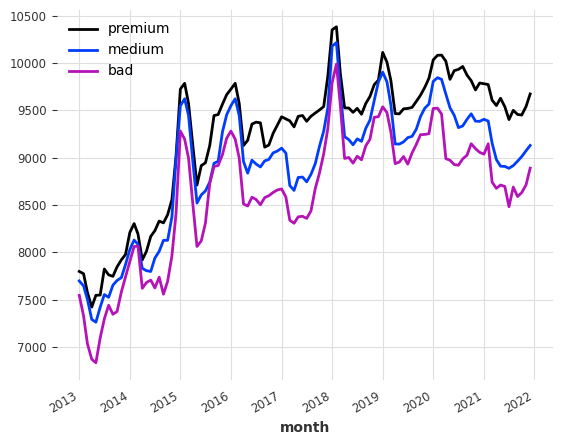

In [7]:
viewChart(2013,2021)